# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, I will analyze a subset of 426K used car records to ensure efficient processing. The primary objective is to identify the key factors that influence car prices. The outcome of this analysis will provide actionable insights and recommendations for the client **a used car dealership** on what attributes consumers value most when purchasing a used vehicle.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

The business goal is to identify the main factors that drive used car prices so a dealership can refine inventory choices, pricing, and marketing to boost profitability and meet customer demand.

From a data science perspective, this is a **supervised regression problem** with car price as the target variable. Historical sales data will be analyzed to measure the impact of features such as year, mileage, condition, manufacturer, and model.

To prepare, we will:

* Review data types, ranges, and summary statistics
* Handle missing values, duplicates, and outliers
* Explore distributions and correlations of key variables
* Assess categorical features for completeness and grouping

This ensures the dataset is clean and reliable, enabling accurate modeling and actionable insights.

### Data Understanding

After defining the business problem, the next step is to get familiar with the dataset and assess its quality. The data includes about 426k used cars with features such as price, year, odometer, condition, manufacturer, model, fuel type, and transmission.

Steps to build understanding:

* Review columns, data types, and sample rows
* Check for missing values, duplicates, and unrealistic entries (e.g., negative mileage, extreme prices)
* Explore distributions of numeric features (price, year, odometer)
* Summarize categorical variables (manufacturer, condition, fuel, transmission)
* Analyze relationships between features and price
* Note any quality issues to inform cleaning and preparation

This ensures the dataset is accurate, consistent, and ready to support reliable modeling and insights.


In [2]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Model selection and evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.inspection import permutation_importance

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor

# Metrics
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# Load used cars dataset
df = pd.read_csv('data/vehicles.csv')

In [4]:
# Display the first few rows of the dataset to inspect its structure.
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [5]:
#Preliminary information
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [7]:
# Under stand Data quality 

#Compute percentage of null values per column
null_percentage = df.isna().mean() * 100

# Sort columns by null percentage
sorted_null_percentage = null_percentage.sort_values()

# Display DataFrame
null_df = pd.DataFrame(sorted_null_percentage, columns=['Null_Percentage'])
null_df 


,Null_Percentage
id,0.000000
price,0.000000
state,0.000000
region,0.000000
year,0.282281
transmission,0.598763
fuel,0.705819
odometer,1.030735
model,1.236179
title_status,1.930753


In [8]:
# Model column analysis

print(df['model'].unique())

[nan 'sierra 1500 crew cab slt' 'silverado 1500' ... 'gand wagoneer'
 '96 Suburban' 'Paige Glenbrook Touring']


In [9]:
#analyze how numeric features in dataset relate to the price
numeric = df.select_dtypes(include=[np.number])
if 'price' in numeric.columns:
    corr = numeric.corr()['price'].sort_values(ascending=False)
    print('\nTop correlations with price:')
    print(corr.head(10))


Top correlations with price:
price       1.000000
odometer    0.010032
id         -0.002779
year       -0.004925
Name: price, dtype: float64


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

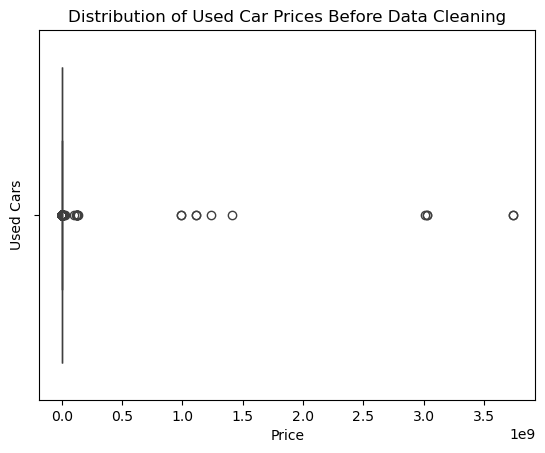

<Figure size 640x480 with 0 Axes>

In [10]:
sns.boxplot(data=df, x='price')
plt.title("Distribution of Used Car Prices Before Data Cleaning")
plt.xlabel("Price")
plt.ylabel("Used Cars")
plt.show()  
# Save the figure to the images folder
plt.savefig("images/used_car_price_boxplot_before_data_cleaning.png")

In [11]:
# Data cleaning and feature engineering
cols_to_try = ['price','year','manufacturer','model','condition','cylinders','fuel','odometer','title_status','transmission','drive','size','type','paint_color','state']
existing = [c for c in cols_to_try if c in df.columns]
print('Using columns:', existing)
df2 = df[existing].copy()

# Convert types: Ensure 'year' and 'odometer' are numeric (non-numeric → NaN)
if 'year' in df2.columns:
    df2['year'] = pd.to_numeric(df2['year'], errors='coerce')
if 'odometer' in df2.columns:
    df2['odometer'] = pd.to_numeric(df2['odometer'], errors='coerce')

# Drop rows missing price or year
df2 = df2.dropna(subset=['price','year'])

# Filter unreasonable prices, Keep only cars priced between $100 and $200,000
df2 = df2[(df2['price']>100) & (df2['price']<200000)]
print('****************************************')
print('After cleaning, shape:', df2.shape)
print('****************************************')
df2.head()


Using columns: ['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']
****************************************
After cleaning, shape: (389191, 15)
****************************************


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
27,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,NaN,pickup,white,al
28,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,NaN,pickup,blue,al
29,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,NaN,pickup,red,al
30,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,NaN,pickup,red,al
31,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al


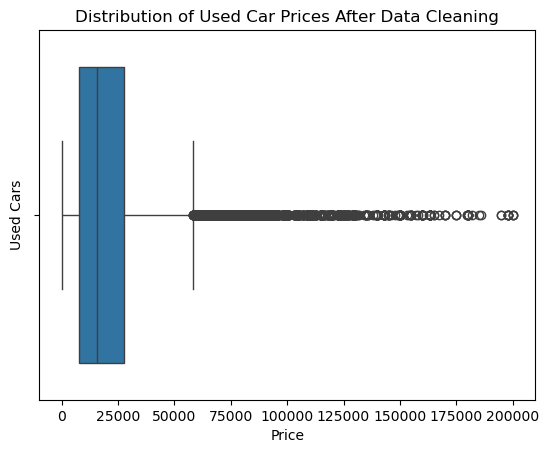

<Figure size 640x480 with 0 Axes>

In [12]:
# Box plot of price after cleaning df2

sns.boxplot(data=df2, x='price')
plt.title("Distribution of Used Car Prices After Data Cleaning")
plt.xlabel("Price")
plt.ylabel("Used Cars")
plt.show()  
# Save the figure to the images folder
plt.savefig("images/used_car_price_boxplot_after_data_cleaning.png")

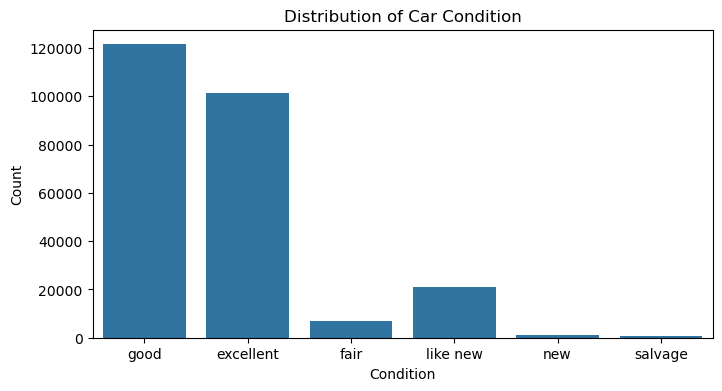

In [15]:
# Example: Bar plot for 'condition'
plt.figure(figsize=(8,4))
sns.countplot(x='condition', data=df)
plt.title('Distribution of Car Condition')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.savefig('images/Distribution-of-Car-Condition.png')
plt.show()


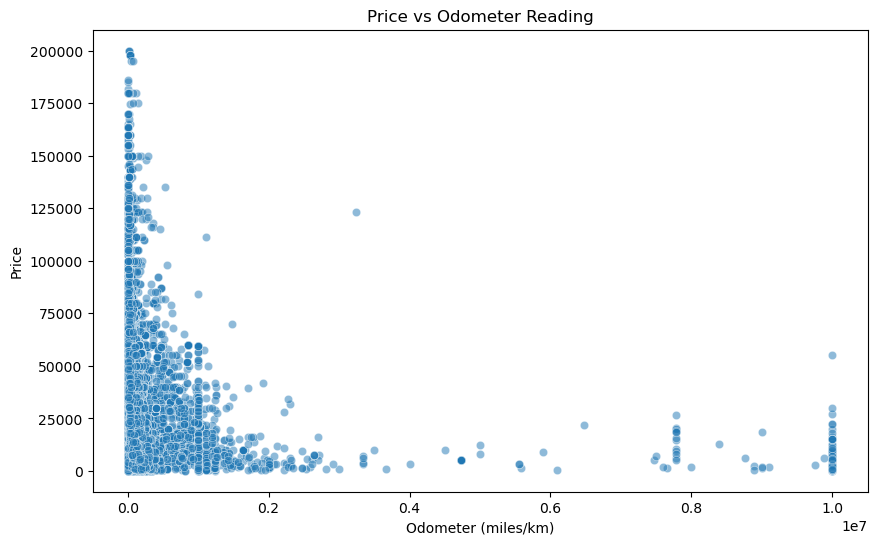

<Figure size 640x480 with 0 Axes>

In [16]:
# Price vs Odometer Scatter Plot
# In this plot, we are visualizing the relationship between the odometer reading 
# (mileage) and the price of used cars. Each point represents one car, and alpha 
# is used to make overlapping points semi-transparent for better readability.

plt.figure(figsize=(10,6))
sns.scatterplot(data=df2, x='odometer', y='price', alpha=0.5)  # alpha makes points transparent
plt.title("Price vs Odometer Reading")
plt.xlabel("Odometer (miles/km)")
plt.ylabel("Price")
plt.show()
plt.savefig("images/price_vs_odometer.png", dpi=300)


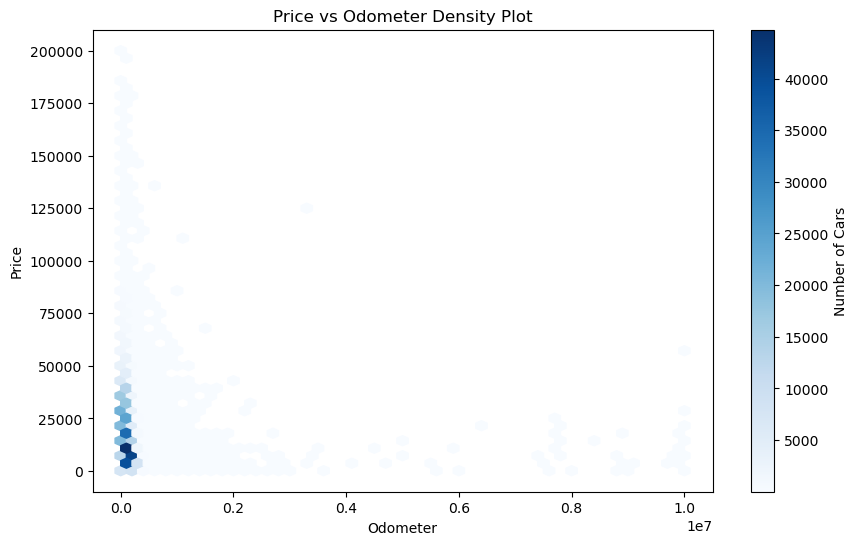

In [17]:
# Price vs Odometer Hexbin Density Plot
# Here, we visualize the density of cars in the price vs odometer space. 
# This is especially useful for large datasets, as it shows regions with 
# many cars (darker hexagons) versus few cars (lighter hexagons).

plt.figure(figsize=(10,6))
plt.hexbin(df2['odometer'], df2['price'], gridsize=50, cmap='Blues', mincnt=1)
plt.colorbar(label='Number of Cars')
plt.title("Price vs Odometer Density Plot")
plt.xlabel("Odometer")
plt.ylabel("Price")

# Save the plot
plt.savefig("images/price_vs_odometer_density.png", dpi=300)

# Show the plot
plt.show()


In [18]:
# ------------------------------
# Step 1: Separate target and features
# ------------------------------
y = df2['price']
X = df2.drop(columns=['price'])

print("Target (y) preview:")
print(y.head())
print("\nFeature (X) preview:")
print(X.head())

# ------------------------------
# Step 2: Identify numeric and categorical features
# ------------------------------
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()

# Include selected categorical features
selected_categorical = ['manufacturer', 'model', 'condition', 'cylinders', 
                        'fuel', 'title_status', 'transmission', 'drive', 
                        'size', 'type', 'paint_color', 'state']

print("\nNumeric features:", numeric_features)
print("Selected categorical features:", selected_categorical)


Target (y) preview:
27    33590
28    22590
29    39590
30    30990
31    15000
Name: price, dtype: int64

Feature (X) preview:
      year manufacturer                     model  condition    cylinders  \
27  2014.0          gmc  sierra 1500 crew cab slt       good  8 cylinders   
28  2010.0    chevrolet            silverado 1500       good  8 cylinders   
29  2020.0    chevrolet       silverado 1500 crew       good  8 cylinders   
30  2017.0       toyota      tundra double cab sr       good  8 cylinders   
31  2013.0         ford                 f-150 xlt  excellent  6 cylinders   

   fuel  odometer title_status transmission drive       size    type  \
27  gas   57923.0        clean        other   NaN        NaN  pickup   
28  gas   71229.0        clean        other   NaN        NaN  pickup   
29  gas   19160.0        clean        other   NaN        NaN  pickup   
30  gas   41124.0        clean        other   NaN        NaN  pickup   
31  gas  128000.0        clean    automatic   rwd

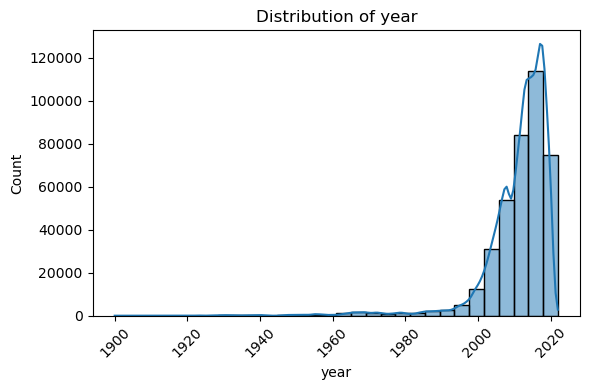

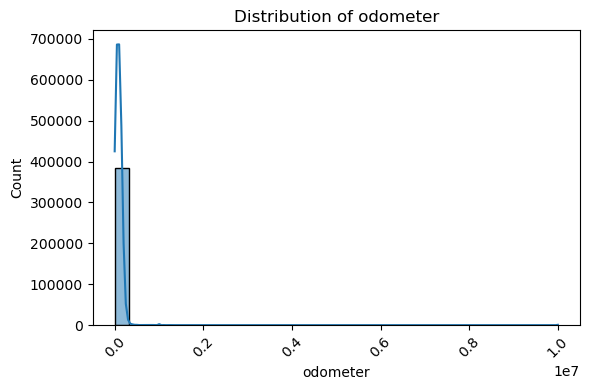

In [19]:
# ------------------------------
# Step 3: Visualize numeric features
# ------------------------------
for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.histplot(X[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    plt.savefig(f'images/numeric_{col}.png')
    plt.close()


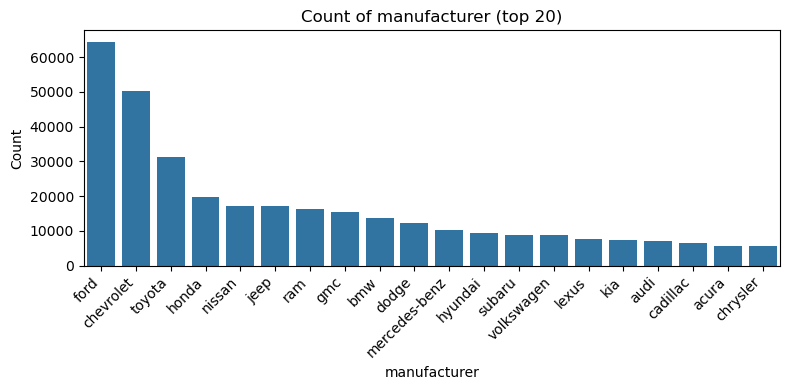

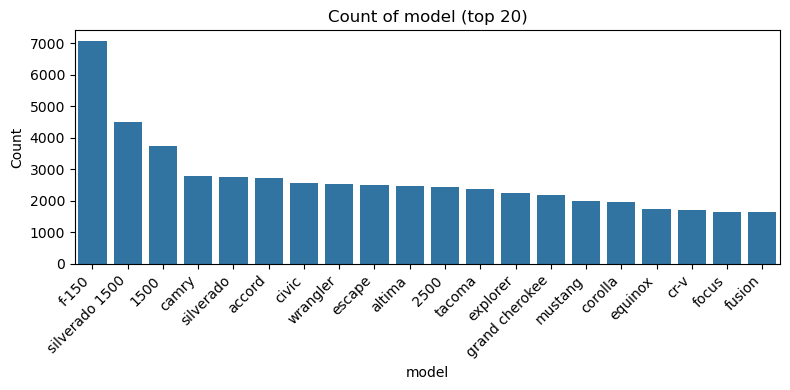

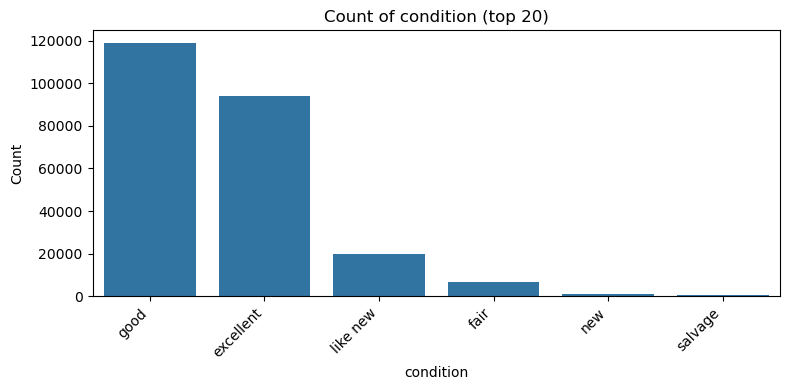

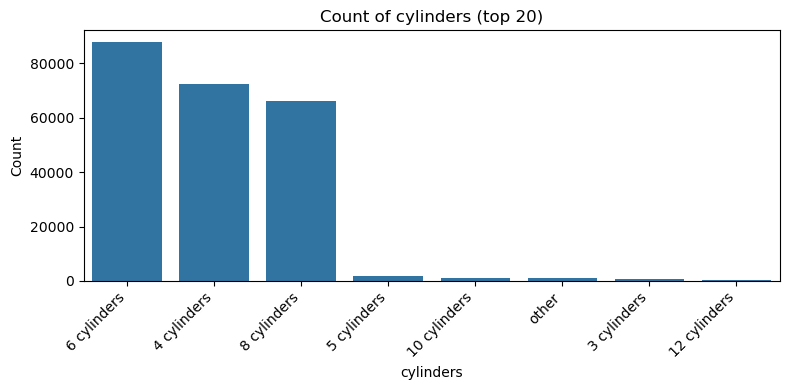

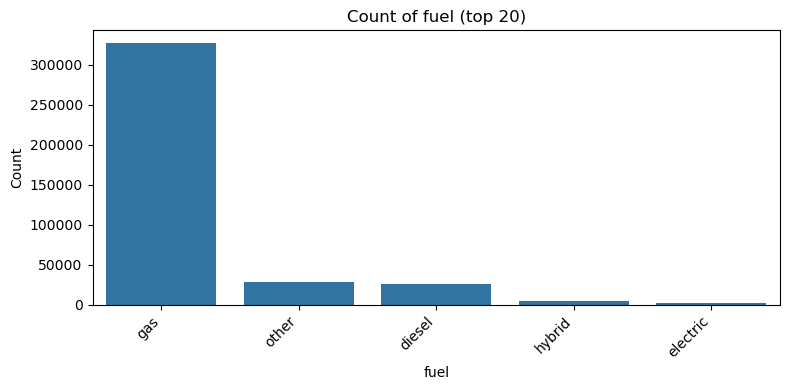

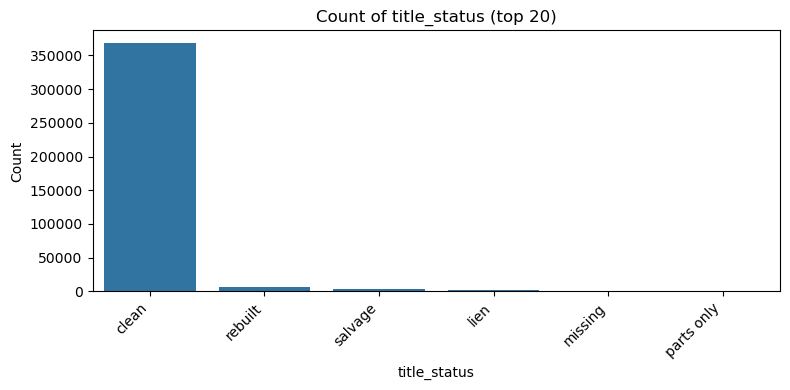

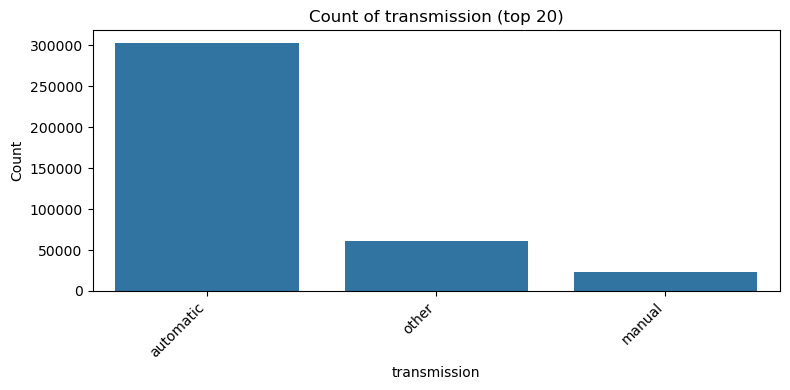

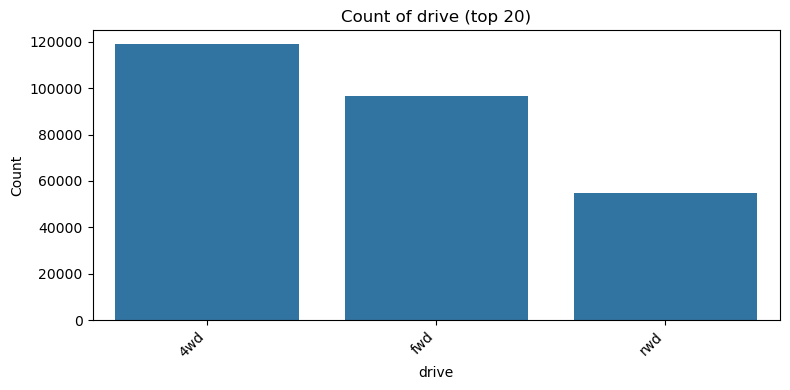

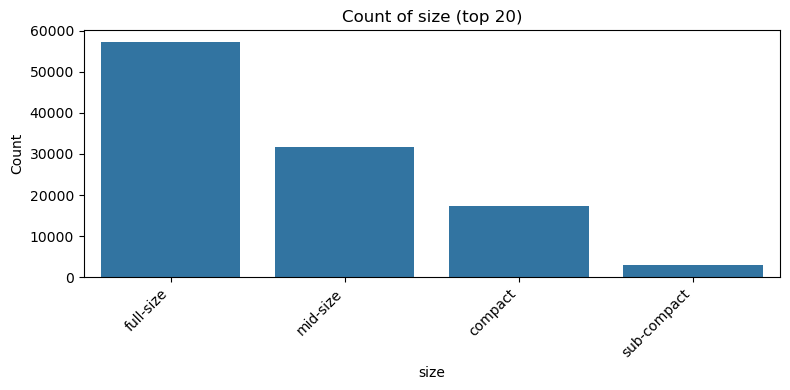

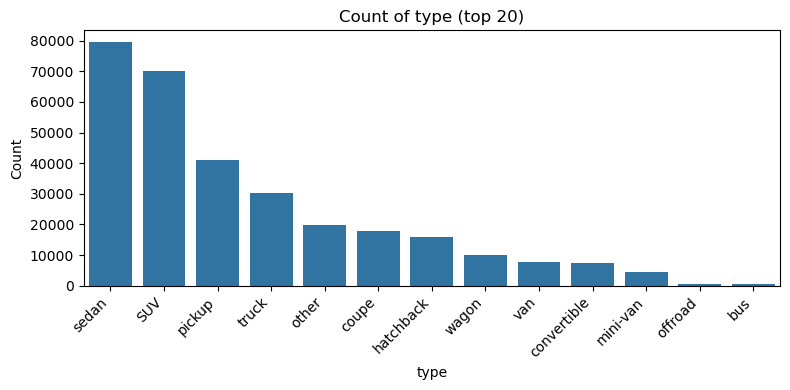

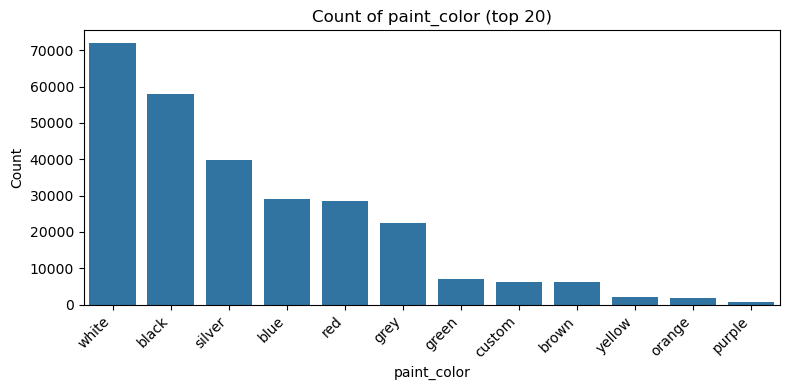

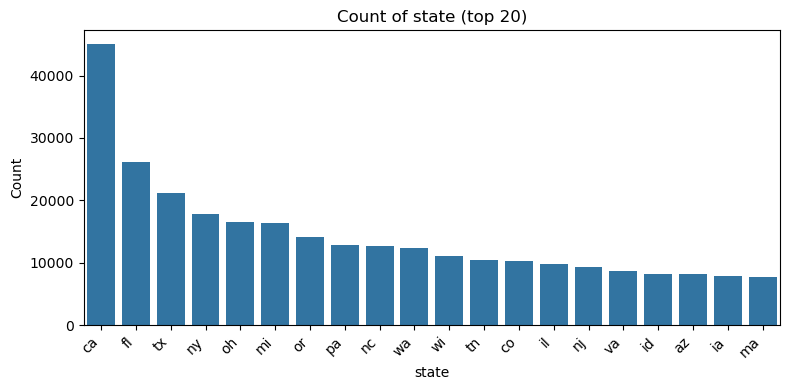

In [20]:

# ------------------------------
# Step 4: Visualize categorical features
# ------------------------------
for col in selected_categorical:
    plt.figure(figsize=(8,4))
    top_values = X[col].value_counts().nlargest(20).index
    sns.countplot(data=X, x=col, order=top_values)
    plt.title(f'Count of {col} (top 20)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
    plt.savefig(f'images/categorical_{col}.png')
    plt.close()


In [21]:
# Numeric columns: scale values
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Categorical columns: one-hot encode
categorical_transformer = Pipeline(steps=[
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # updated argument
])

# Combine numeric and selected categorical pipelines
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, selected_categorical)
])

print("\nPreprocessor defined with numeric and selected categorical features.")

# ------------------------------
# Step 6: Split dataset into train and test
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)



Preprocessor defined with numeric and selected categorical features.
Train shape: (311352, 14)
Test shape: (77839, 14)


### Modeling

In this phase, the prepared dataset is used to build predictive models for **used car prices**. The primary objective is to predict the **log-transformed price** using regression models. Key steps include:

1. **Data Splitting:** Divide the dataset into training and testing sets for model evaluation.
2. **Model Training:** Train regression models such as:

   * **Random Forest Regressor**
   * **Linear Regressor**
   * **Hist Gradient Boosting Regressor**
3. **Parameter Tuning:** Experiment with hyperparameters to improve model performance.
4. **Predictions:** Generate predictions on the test set.
5. **Performance Evaluation:** Use metrics like:

   * **RMSE (Root Mean Squared Error)** – average error of predictions.
   * **R² (R-squared)** – proportion of variance explained by the model.
6. **Feature Importance Analysis:** Understand which features most influence car prices.

**Goal:** Inform business decisions by identifying key drivers of used car prices.

---

## **RandomForestRegressor Details**

The **RandomForestRegressor** is an **ensemble tree-based model** that combines multiple decision trees to improve predictive accuracy. It is particularly effective for capturing **non-linear relationships**.

### **Steps Taken**

1. **Data Sampling:**

   * A subset of the dataset was used for faster training.
   * Training set: 5% of data, Test set: remaining 95%.

2. **Model Initialization:**

   ```python
   from sklearn.ensemble import RandomForestRegressor

   model = RandomForestRegressor(
       n_estimators=5,     # number of trees
       random_state=42,    # reproducibility
       n_jobs=-1           # use all CPU cores
   )
   ```

3. **Training:**

   * The model was trained on the sampled training data.

4. **Predictions:**

   * Predictions were generated on the test set.

5. **Evaluation Metrics:**

   * **RMSE:** 0.398
   * **R²:** 0.845

6. **Feature Importance:**

   * The model ranks features by importance using `feature_importances_`.
   * Top drivers of used car prices include **mileage, car age, condition**.

---

### **Key Advantages**

* Handles non-linear relationships and feature interactions.
* Provides **feature importance** for interpretability.
* Robust to overfitting when enough trees are used.

### **Limitations**

* Computationally intensive for large datasets.
* Requires **hyperparameter tuning** (e.g., `n_estimators`, `max_depth`) for best results.

---

### **Conclusion**

The RandomForestRegressor:

* Captures complex patterns in the data.
* Provides actionable insights into which features drive used car prices.
* Performs better than simpler models (like Linear Regression) on this dataset.

> **Tip:** For larger datasets, consider **GridSearchCV** or **RandomizedSearchCV** to optimize performance.

---

If you want, I can **also draft a visual step-by-step notebook cell structure** for modeling including RandomForest, metrics calculation, and feature importance plots for beginners. It would be ready to copy-paste into your notebook.

Do you want me to do that next?


RandomForestRegressor Performance:
RMSE: 8227.195
R²: 0.699


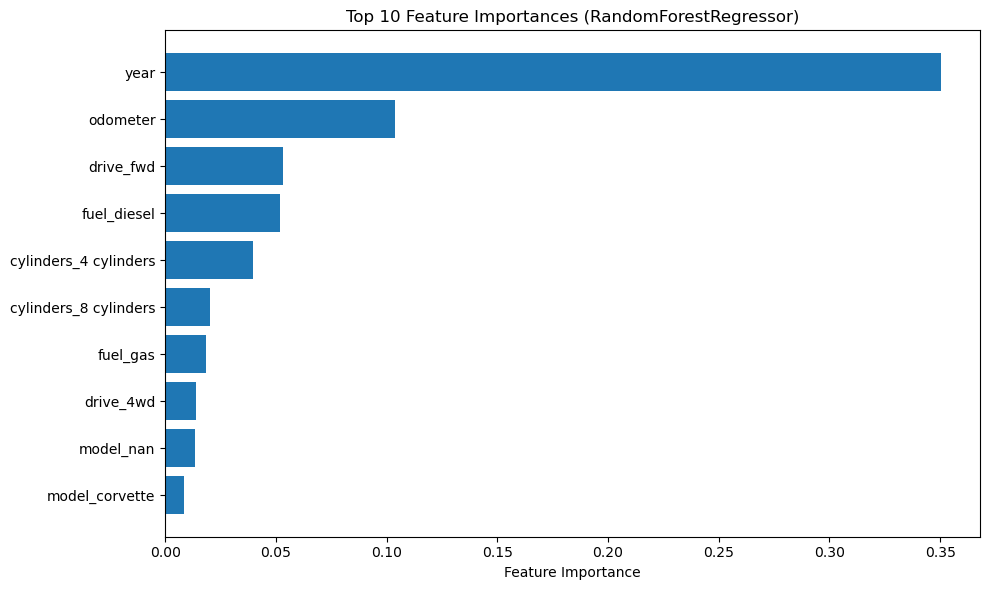

In [22]:
# ------------------------------
# RandomForestRegressor Modeling
# ------------------------------
# Sample data (optional: can use full dataset)
# ------------------------------
# For speed, we can sample a fraction of training data
train_fraction = 0.05
X_train_sample = X_train.sample(frac=train_fraction, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

# ------------------------------
# Initialize RandomForestRegressor
# ------------------------------
rf_model = RandomForestRegressor(
    n_estimators=5,     # number of trees
    random_state=42,
    n_jobs=-1
)

# ------------------------------
# Train the model
# ------------------------------
rf_model.fit(preprocessor.fit_transform(X_train_sample), y_train_sample)

# ------------------------------
# Make predictions on test set
# ------------------------------
y_pred = rf_model.predict(preprocessor.transform(X_test))

# ------------------------------
# Evaluate performance
# ------------------------------
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RandomForestRegressor Performance:")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

# ------------------------------
# Feature importance
# ------------------------------
# Get feature names after preprocessing
numeric_names = numeric_features
categorical_names = preprocessor.named_transformers_['cat']['ohe'].get_feature_names_out(selected_categorical)
all_feature_names = np.concatenate([numeric_names, categorical_names])

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot top 10 feature importances
plt.figure(figsize=(10,6))
plt.barh(range(10), importances[indices][:10][::-1], align='center')
plt.yticks(range(10), all_feature_names[indices][:10][::-1])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances (RandomForestRegressor)')
plt.tight_layout()
plt.show()


In [23]:
# ------------------------------
# Linear Regression (with missing value handling)
# ------------------------------
# Impute numeric and categorical columns
numeric_transformer_lr = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # fill missing numeric values
    ('scaler', StandardScaler())
])

categorical_transformer_lr = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # fill missing categorical values
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

# Combine pipelines
preprocessor_lr = ColumnTransformer([
    ('num', numeric_transformer_lr, numeric_features),
    ('cat', categorical_transformer_lr, selected_categorical)  
])

# Use a small subset to avoid memory issues
X_train_lr_subset, _, y_train_lr_subset, _ = train_test_split(
    X_train, y_train, train_size=0.05, random_state=42
)

lr_model = LinearRegression()
lr_model.fit(preprocessor_lr.fit_transform(X_train_lr_subset), y_train_lr_subset)

# Predict
X_test_lr_subset = X_test[numeric_features + selected_categorical]  
y_pred_lr = lr_model.predict(preprocessor_lr.transform(X_test_lr_subset))

# Evaluate
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression Performance:")
print("RMSE:", rmse_lr)
print("R²:", r2_lr)


Linear Regression Performance:
RMSE: 11462.369098274028
R²: 0.4149154353940313


In [24]:
# ------------------------------
# Hist Gradient Boosting Regressor (handles NaNs natively)
# ------------------------------
# Preprocessing for HGB: Ordinal encoding + standard scaling
numeric_transformer_hgb = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer_hgb = Pipeline([
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor_hgb = ColumnTransformer([
    ('num', numeric_transformer_hgb, numeric_features),
    ('cat', categorical_transformer_hgb, selected_categorical)
])

# Optional smaller subset for speed
X_train_hgb_subset, _, y_train_hgb_subset, _ = train_test_split(X_train, y_train, train_size=0.2, random_state=42)

hgb_model = HistGradientBoostingRegressor(max_iter=100, random_state=42)
hgb_model.fit(preprocessor_hgb.fit_transform(X_train_hgb_subset), y_train_hgb_subset)

# Predict
y_pred_hgb = hgb_model.predict(preprocessor_hgb.transform(X_test))
rmse_hgb = np.sqrt(mean_squared_error(y_test, y_pred_hgb))
r2_hgb = r2_score(y_test, y_pred_hgb)
print("\nHist Gradient Boosting Performance:")
print("RMSE:", rmse_hgb)
print("R²:", r2_hgb)


Hist Gradient Boosting Performance:
RMSE: 7545.610845905797
R²: 0.7464528871600804


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
# ------------------------------
# Faster: Train, evaluate, and compare all 3 models
# ------------------------------

# ----- Preprocessing -----
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Sparse OHE (default) - better for RF & Linear Regression
categorical_transformer_sparse = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

# Dense OHE - required for HGB
categorical_transformer_dense = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Sparse preprocessor (for RF, Linear)
preprocessor_sparse = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer_sparse, selected_categorical)
])

# Dense preprocessor (for HGB)
preprocessor_dense = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer_dense, selected_categorical)
])

# ----- Train/Test Split -----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ----- Models -----
models = {
    'Random Forest': (RandomForestRegressor(n_estimators=20, random_state=42, n_jobs=-1), preprocessor_sparse),
    'Linear Regression': (LinearRegression(), preprocessor_sparse),
    'Hist Gradient Boosting': (HistGradientBoostingRegressor(max_iter=50, random_state=42), preprocessor_dense)
}

# ----- Evaluate models -----
results = []

for name, (model, preproc) in models.items():
    pipeline = Pipeline([
        ('preprocessor', preproc),
        ('model', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append({'Model': name, 'RMSE': rmse, 'R²': r2})

performance_df = pd.DataFrame(results)
print("Model Performance Summary:")
display(performance_df)

# ----- Plot Comparison -----
performance_melted = performance_df.melt(id_vars='Model', value_vars=['RMSE', 'R²'],
                                         var_name='Metric', value_name='Value')


In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='Value', hue='Metric', data=performance_melted, palette=['#1f77b4', '#2ca02c'])
plt.title('Model Comparison: RMSE vs R²')
plt.ylabel('Value')
plt.ylim(0, performance_melted['Value'].max()*1.1)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


### **Deployment**

Once a suitable model has been identified and evaluated, the next step is **deployment**, which involves making the trained model available for real-world use. Deployment bridges the gap between experimentation and business value by enabling the model to generate predictions on new, unseen data.

Key aspects of deployment:

1. **Model Serialization**

   * The trained model can be saved to disk using tools such as `joblib` or `pickle`.
   * Example:

     ```python
     import joblib
     joblib.dump(best_model, "car_price_model.pkl")
     ```
   * This allows reloading the model later without retraining:

     ```python
     loaded_model = joblib.load("car_price_model.pkl")
     ```

2. **Integration into Applications**

   * The serialized model can be embedded into a Python script, web service, or batch pipeline.
   * Example options:

     * **Flask/FastAPI** → Expose the model as a REST API endpoint.
     * **Streamlit/Dash** → Create an interactive dashboard for business users.
     * **Batch jobs** → Automate predictions on scheduled datasets.

3. **Scalability and Performance**

   * In production, models should be optimized for **response time**, **memory usage**, and **throughput**.
   * Containerization tools like **Docker** help package the environment and dependencies consistently.

4. **Monitoring and Maintenance**

   * Model performance may degrade over time due to **data drift** or **changes in business conditions**.
   * Continuous monitoring of key metrics (e.g., RMSE, R², input feature distributions) is critical.
   * Retraining schedules should be established when performance drops below a threshold.


In [ ]:
# ------------------------------
# Deployment-ready pipeline
# ------------------------------
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# ---- Step 0: Define features and target ----
y = df2['price']
X = df2.drop(columns=['price'])

numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# ---- Step 1: Train/test split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---- Step 2: Preprocessing ----
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    # Force dense output to avoid sparse matrix issues with HGB
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# ---- Step 3: Define models ----
models = {
    'Random Forest': RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1),
    'Linear Regression': LinearRegression(),
    'Hist Gradient Boosting': HistGradientBoostingRegressor(max_iter=100, random_state=42)
}

# ---- Step 4: Train, evaluate, and store results ----
results = []
pipelines = {}
for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append({'Model': name, 'RMSE': rmse, 'R²': r2})
    pipelines[name] = pipe

# ---- Step 5: Compare performance ----
perf_df = pd.DataFrame(results).sort_values(by='RMSE')
print("Model Performance Comparison:")
display(perf_df)

# Plot RMSE for comparison
plt.figure(figsize=(8,5))
sns.barplot(x='RMSE', y='Model', data=perf_df, palette='viridis')
plt.title('Model RMSE Comparison')
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.tight_layout()
plt.show()

# ---- Step 6: Save the best model ----
# Create models folder if not exists
os.makedirs("models", exist_ok=True)

best_model_name = perf_df.iloc[0]['Model']
best_pipeline = pipelines[best_model_name]
model_path = f"models/{best_model_name.replace(' ', '_').lower()}_pipeline.pkl"
joblib.dump(best_pipeline, model_path)
print(f"\n✅ Best model '{best_model_name}' saved as '{model_path}'.")

# ---- Step 7: Prediction function using saved model ----
def predict_price(new_data, model_path=model_path):
    """
    Load the saved pipeline and predict prices for new data.
    new_data: pd.DataFrame with same features as training data
    """
    model = joblib.load(model_path)
    return model.predict(new_data)



In this project’s context:
The **HistGradientBoostingRegressor** emerged as the most suitable model. By saving it with `joblib` and wrapping it in an API (Flask/FastAPI), a client can input details of a used car (e.g., mileage, year, fuel type, brand) and receive an estimated price instantly. This makes the model actionable and directly valuable for business use cases like pricing recommendations, negotiation support, or online marketplaces.
